In [2]:
from mp_api.client import MPRester

In [3]:
# f = 'MP_API_KEY.txt'
# API_KEY = open(f).readlines()[0].strip()
API_KEY = 'tpDDyUfqGz09FTSgUv0llbT6xqb7uQru'

In [31]:
# Get material data for silicon (mp-149 is the Materials Project ID for silicon)
material_id = "mp-1194828"
mpr = MPRester(API_KEY)
with MPRester(API_KEY) as mpr:
    structure = mpr.get_structure_by_material_id(material_id)
structure_dict = structure.as_dict()
structure

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Structure Summary
Lattice
    abc : 14.128984673767679 14.128984673767679 12.415641611318563
 angles : 73.5725500147357 73.5725500147357 59.44912844997421
 volume : 2018.092876926347
      A : 7.005589 12.269879 0.0
      B : -7.005589 12.269879 0.0
      C : 0.0 4.043159 11.738868
    pbc : True True True
PeriodicSite: Si (2.929, 10.56, 8.858) [0.515, 0.09693, 0.7546]
PeriodicSite: Si (-2.929, 10.56, 8.858) [0.09693, 0.515, 0.7546]
PeriodicSite: Si (-2.929, 18.02, 2.881) [0.485, 0.9031, 0.2454]
PeriodicSite: Si (2.929, 18.02, 2.881) [0.9031, 0.485, 0.2454]
PeriodicSite: Si (2.926, 9.678, 5.839) [0.5213, 0.1036, 0.4974]
PeriodicSite: Si (-2.926, 9.678, 5.839) [0.1036, 0.5213, 0.4974]
PeriodicSite: Si (-2.926, 18.91, 5.9) [0.4787, 0.8964, 0.5026]
PeriodicSite: Si (2.926, 18.91, 5.9) [0.8964, 0.4787, 0.5026]
PeriodicSite: Si (2.873, 8.418, 1.525) [0.5267, 0.1166, 0.1299]
PeriodicSite: Si (-2.873, 8.418, 1.525) [0.1166, 0.5267, 0.1299]
PeriodicSite: Si (-2.873, 20.16, 10.21) [0.4733, 0.88

In [5]:
graph = pydot.Dot(graph_type='graph')
visit(structure_dict, 'structure')
# Set the font size for text inside nodes
node_text_font_size = 24  # Adjust the font size as needed
# Set the layout attribute to create a "thin" graph
graph.set_graph_defaults(rankdir='LR')
# Loop through all nodes and set their font size
for node in graph.get_nodes():
    node.set('fontsize', node_text_font_size)
graph.write_png(os.path.join(os.getcwd(), 'structure_tree.png'))

NameError: name 'pydot' is not defined

In [6]:
structure_dict

{'@module': 'pymatgen.core.structure',
 '@class': 'Structure',
 'charge': 0,
 'lattice': {'matrix': [[3.333573, 0.0, 1.924639],
   [1.111191, 3.142924, 1.924639],
   [0.0, 0.0, 3.849278]],
  'pbc': (True, True, True),
  'a': 3.8492784033699095,
  'b': 3.8492794116013456,
  'c': 3.849278,
  'alpha': 60.00001213094421,
  'beta': 60.00000346645984,
  'gamma': 60.0000109754579,
  'volume': 40.32952684741405},
 'properties': {},
 'sites': [{'species': [{'element': 'Si', 'occu': 1}],
   'abc': [0.875, 0.875, 0.875],
   'xyz': [3.8891685, 2.7500584999999997, 6.7362365],
   'properties': {'magmom': -0.0},
   'label': 'Si'},
  {'species': [{'element': 'Si', 'occu': 1}],
   'abc': [0.125, 0.125, 0.125],
   'xyz': [0.5555955, 0.3928655, 0.9623195],
   'properties': {'magmom': -0.0},
   'label': 'Si'}]}

In [32]:
import nglview as nv
view = nv.show_pymatgen(structure)
view.add_spacefill(radius_type='vdw', color='element')
view

NGLWidget()

#### Info about the system

In [34]:
with MPRester(API_KEY) as mpr:
    entries = mpr.get_entry_by_material_id(material_id)
entry = entries[0]
print(entry)

Retrieving ThermoDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

mp-1194828-GGA ComputedStructureEntry - Si34 O74     (Si17O37)
Energy (Uncorrected)     = -815.0340 eV (-7.5466  eV/atom)
Correction               = -217.0525 eV (-2.0097  eV/atom)
Energy (Final)           = -1032.0865 eV (-9.5564  eV/atom)
Energy Adjustments:
  MP2020 anion correction (oxide): -50.8380  eV (-0.4707  eV/atom)
  MP GGA(+U)/R2SCAN mixing adjustment: -166.2145 eV (-1.5390  eV/atom)
Parameters:
  potcar_spec            = [{'titel': 'PAW_PBE Si 05Jan2001', 'hash': 'b2b0ea6feb62e7cde209616683b8f7f5'}, {'titel': 'PAW_PBE O 08Apr2002', 'hash': '7a25bc5b9a5393f46600a4939d357982'}]
  is_hubbard             = False
  hubbards               = {}
  run_type               = GGA
Data:
  oxide_type             = oxide
  aspherical             = True
  last_updated           = 2020-04-29 20:55:05.995000
  task_id                = mp-1336114
  material_id            = mp-1194828
  oxidation_states       = {}
  run_type               = GGA


In [35]:
entry_dict = entry.as_dict()
label = list(entry_dict['composition'].keys())[0]
xc = entry_dict['data']['run_type']
pp = entry_dict['parameters']['potcar_spec'][0]['titel']
print(f'The calculation was performed for {label}')
print(f'The calculation was performed with {xc} and {pp}')

The calculation was performed for Si
The calculation was performed with GGA and PAW_PBE Si 05Jan2001


In [36]:
with MPRester(API_KEY) as mpr:
    band_structure = mpr.get_bandstructure_by_material_id(material_id)
band_structure

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

MPRestError: No setyawan_curtarolo band structure data found for mp-1194828

with MPRester(API_KEY) as mpr:
    mpr.get_entries()

In [11]:
efermi = band_structure.efermi
print('The fermi energy is at', efermi, 'eV')

The fermi energy is at 5.63019776 eV


In [13]:
band_structure.__dir__()

['efermi',
 'lattice_rec',
 'kpoints',
 'labels_dict',
 'structure',
 'projections',
 'bands',
 'nb_bands',
 'is_spin_polarized',
 'distance',
 'branches',
 '__module__',
 '__doc__',
 '__init__',
 'get_equivalent_kpoints',
 'get_branch',
 'apply_scissor',
 'as_dict',
 'get_projection_on_elements',
 'get_projections_on_elements_and_orbitals',
 'is_metal',
 'get_vbm',
 'get_cbm',
 'get_band_gap',
 'get_direct_band_gap_dict',
 'get_direct_band_gap',
 'get_sym_eq_kpoints',
 'get_kpoint_degeneracy',
 'from_dict',
 'from_old_dict',
 '__dict__',
 '__weakref__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__',
 'REDIRECT',
 'to_json',
 'unsafe_hash',
 '_validate_monty',
 'validate_monty_v1',
 'validate_monty_v2',
 '__get_validators__',
 '__get_py

In [12]:
bs_dict = band_structure.as_dict()
bs_dict

{'@module': 'pymatgen.electronic_structure.bandstructure',
 '@class': 'BandStructureSymmLine',
 'lattice_rec': {'@module': 'pymatgen.core.lattice',
  '@class': 'Lattice',
  'matrix': [[-1.148888338803558, -1.1488883388035576, 1.1488883388035576],
   [-1.1488883388035576, 1.1488883388035576, -1.1488883388035578],
   [1.1488883388035578, -1.148888338803558, -1.1488883388035576]],
  'pbc': (True, True, True)},
 'efermi': 5.63019776,
 'kpoints': [[0.0, 0.0, 0.0],
  [0.02173913, 0.0, 0.02173913],
  [0.04347826, 0.0, 0.04347826],
  [0.06521739, 0.0, 0.06521739],
  [0.08695652, 0.0, 0.08695652],
  [0.10869565, 0.0, 0.10869565],
  [0.13043478, 0.0, 0.13043478],
  [0.15217391, 0.0, 0.15217391],
  [0.17391304, 0.0, 0.17391304],
  [0.19565217, 0.0, 0.19565217],
  [0.2173913, 0.0, 0.2173913],
  [0.23913043, 0.0, 0.23913043],
  [0.26086957, 0.0, 0.26086957],
  [0.2826087, 0.0, 0.2826087],
  [0.30434783, 0.0, 0.30434783],
  [0.32608696, 0.0, 0.32608696],
  [0.34782609, 0.0, 0.34782609],
  [0.3695652

In [33]:
band_structure.get_vbm() # VBM is the valence band minimum

{'band_index': defaultdict(list, {<Spin.up: 1>: [1, 2, 3]}),
 'kpoint_index': [0, 72, 73],
 'kpoint': <pymatgen.electronic_structure.bandstructure.Kpoint at 0x1d9be7f2a90>,
 'energy': 5.6165,
 'projections': {<Spin.up: 1>: array([[0.    , 0.    ],
         [0.0066, 0.0066],
         [0.1974, 0.1974],
         [0.0098, 0.0098],
         [0.    , 0.    ],
         [0.    , 0.    ],
         [0.    , 0.    ],
         [0.    , 0.    ],
         [0.    , 0.    ]])}}

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

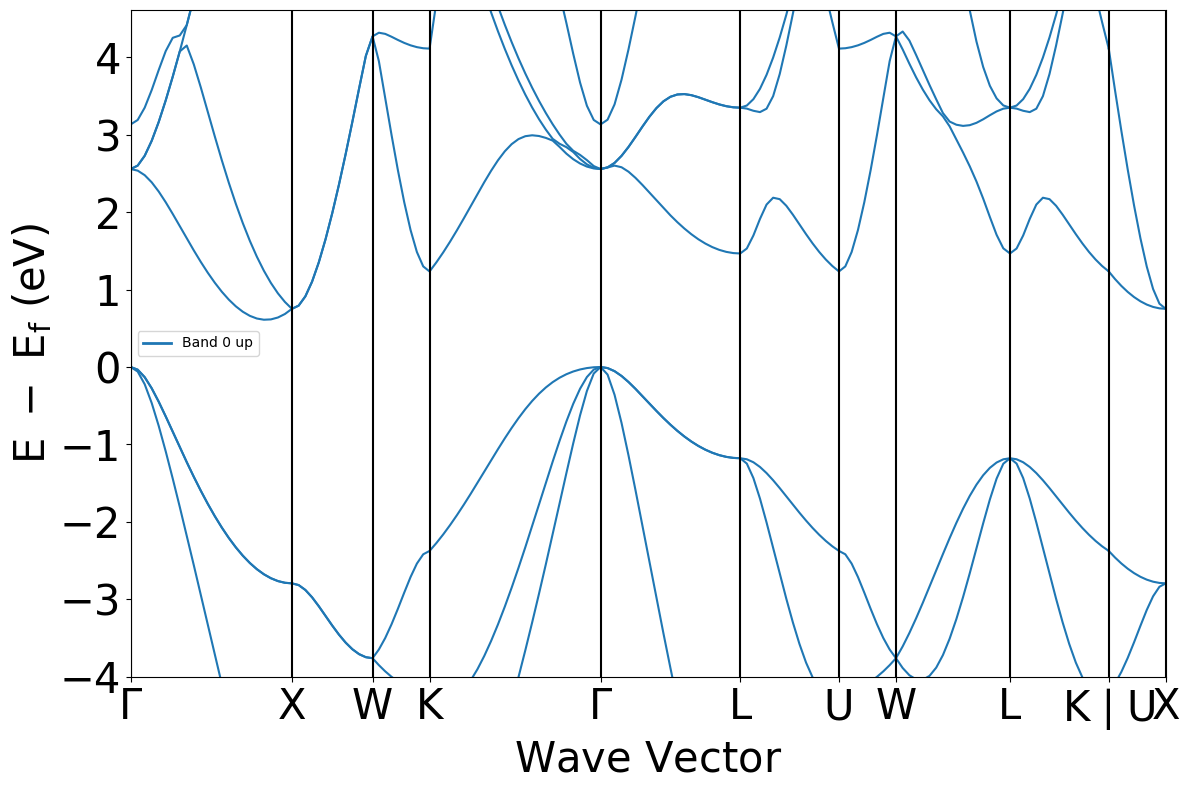

In [15]:
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import BSPlotter

plotter = BSPlotter(band_structure)
plotter.get_plot()


In [16]:
with MPRester(API_KEY) as mpr:
    dos = mpr.get_dos_by_material_id(material_id)
dos

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
dos_dict = dos.as_dict()

In [20]:
plotter.__dir__()

['bs_projection',
 'dos_projection',
 'vb_energy_range',
 'cb_energy_range',
 'fixed_cb_energy',
 'egrid_interval',
 'font',
 'axis_fontsize',
 'tick_fontsize',
 'legend_fontsize',
 'bs_legend',
 'dos_legend',
 'rgb_legend',
 'fig_size',
 '__module__',
 '__doc__',
 '__init__',
 'get_plot',
 '_rgbline',
 '_get_colordata',
 '_cmyk_triangle',
 '_rgb_triangle',
 '_rb_line',
 '__dict__',
 '__weakref__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

C:\Users\User\anaconda3\envs\mp\lib\site-packages\pymatgen\electronic_structure\plotter.py:2264: UserWarning: Cannot get element projected data; either the projection data doesn't exist, or you don't have a compound with exactly 2 or 3 or 4 unique elements.
  warnings.warn(


(<Axes: xlabel='Wavevector $k$', ylabel='$E-E_F$ / eV'>, <Axes: xlabel='DOS'>)

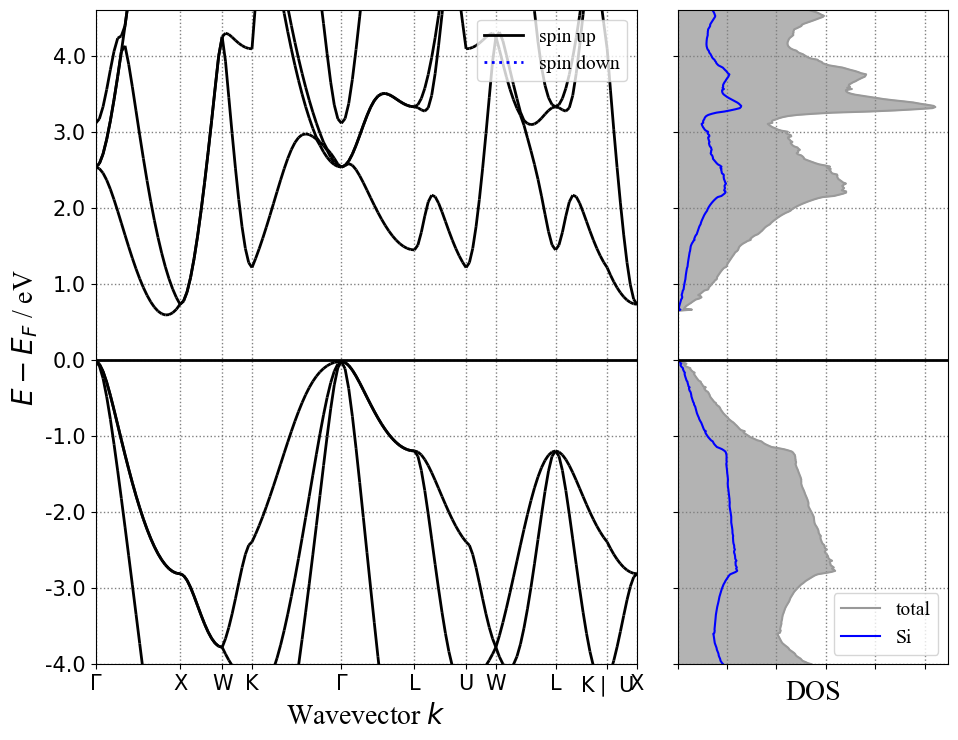

In [18]:
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import BSDOSPlotter

plotter = BSDOSPlotter()
plotter.get_plot(band_structure, dos)

#### Search by properties

In [28]:
dir(HasProps)

['__class__',
 '__doc__',
 '__members__',
 '__module__',
 'absorption',
 'bandstructure',
 'charge_density',
 'chemenv',
 'dielectric',
 'dos',
 'elasticity',
 'electronic_structure',
 'eos',
 'grain_boundaries',
 'insertion_electrodes',
 'magnetism',
 'materials',
 'oxi_states',
 'phonon',
 'piezoelectric',
 'provenance',
 'substrates',
 'surface_properties',
 'thermo',
 'xas']

In [26]:
from emmet.core.summary import HasProps

with MPRester(API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        has_props = [HasProps.dielectric], fields=["material_id"]
    )
    mpids = [doc.material_id for doc in docs]

Retrieving SummaryDoc documents:   0%|          | 0/7277 [00:00<?, ?it/s]

In [27]:
print(mpids)

[MPID(mp-28967), MPID(mp-766094), MPID(mp-36577), MPID(mp-1102092), MPID(mp-720391), MPID(mp-4016), MPID(mp-1029799), MPID(mp-3922), MPID(mp-22192), MPID(mp-17389), MPID(mp-37923), MPID(mp-27171), MPID(mp-1205714), MPID(mp-774146), MPID(mp-561153), MPID(mp-7035), MPID(mp-558864), MPID(mp-1029718), MPID(mp-557574), MPID(mp-867113), MPID(mp-510670), MPID(mp-9583), MPID(mp-25971), MPID(mp-552234), MPID(mp-1018100), MPID(mp-7331), MPID(mp-11714), MPID(mp-696125), MPID(mp-22988), MPID(mp-1111927), MPID(mp-754726), MPID(mp-21084), MPID(mp-11607), MPID(mp-763784), MPID(mp-6449), MPID(mp-34116), MPID(mp-613733), MPID(mp-12263), MPID(mp-1190364), MPID(mp-22473), MPID(mp-1023936), MPID(mp-550506), MPID(mp-19970), MPID(mp-752644), MPID(mp-16934), MPID(mp-648932), MPID(mp-4452), MPID(mp-22867), MPID(mp-16945), MPID(mp-556163), MPID(mp-763240), MPID(mp-774424), MPID(mp-13305), MPID(mp-1217120), MPID(mp-559417), MPID(mp-29510), MPID(mp-974713), MPID(mp-6591), MPID(mp-35015), MPID(mp-559616), MPID(mp

#### Search by chemical composition (exact match)

In [21]:
with MPRester(API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        chemsys="Si-O", fields=["material_id", "band_gap"]
    )
    mpid_bgap_dict = {doc.material_id: doc.band_gap for doc in docs}

Retrieving SummaryDoc documents:   0%|          | 0/343 [00:00<?, ?it/s]

In [30]:
mpid_bgap_dict

{MPID(mp-1194828): 0.09050000000000002,
 MPID(mp-1199711): 0.09720000000000018,
 MPID(mp-1063118): 0.0,
 MPID(mp-1208867): 0.0,
 MPID(mp-1179195): 0.9888999999999999,
 MPID(mp-862998): 2.6763,
 MPID(mp-32566): 0.09609999999999985,
 MPID(mp-32881): 0.18850000000000033,
 MPID(mp-1250755): 0.20499999999999996,
 MPID(mp-638900): 0.10310000000000041,
 MPID(mp-1219421): 0.0706,
 MPID(mp-1221354): 0.030199999999999783,
 MPID(mp-1179275): 0.0,
 MPID(mp-1179651): 3.4528,
 MPID(mp-1173536): 0.08350000000000002,
 MPID(mp-530027): 2.1050999999999997,
 MPID(mp-673849): 0.04090000000000005,
 MPID(mp-731864): 0.008799999999999919,
 MPID(mp-32761): 0.0,
 MPID(mp-10064): 1.7395999999999994,
 MPID(mp-1021503): 4.528499999999999,
 MPID(mp-1071820): 4.716,
 MPID(mp-10851): 5.5428,
 MPID(mp-10948): 5.2394,
 MPID(mp-11684): 5.5458,
 MPID(mp-1179447): 5.6304,
 MPID(mp-1179454): 5.5301,
 MPID(mp-1179488): 0.14189999999999992,
 MPID(mp-1179529): 5.455299999999999,
 MPID(mp-1188220): 5.4517999999999995,
 MPID(m

#### Search by composition (inclusive)

In [ ]:
from mp_api.client import MPRester

with MPRester(API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        elements=["Si", "O"], fields=["material_id", "band_gap", "formula_pretty"]
    )
    mpid_formula_dict = {
        doc.material_id: doc.formula_pretty for doc in docs
    }

Search by composition type

In [40]:
from mp_api.client import MPRester

with MPRester(API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        chemsys="O-*-*", formula="ABC3",
        fields=["material_id" , "band_gap"]
    )
    mpids = [doc.material_id for doc in docs]

Retrieving SummaryDoc documents:   0%|          | 0/2606 [00:00<?, ?it/s]

#### Search by band gap

In [29]:
from mp_api.client import MPRester

with MPRester(API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        band_gap=(3, None), is_stable=True, fields=["material_id"]
    )
    stable_mpids = [doc.material_id for doc in docs]
    
    ## -- Alternative directly using energy above hull:
    docs = mpr.materials.summary.search(
        band_gap=(3, None), energy_above_hull=(0, 0), fields=["material_id"]
    )
    stable_mpids = [doc.material_id for doc in docs]

Retrieving SummaryDoc documents:   0%|          | 0/6092 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/6092 [00:00<?, ?it/s]

In [37]:
stable_mpids

[MPID(mp-11107),
 MPID(mp-1183115),
 MPID(mp-27972),
 MPID(mp-30274),
 MPID(mp-27971),
 MPID(mp-30273),
 MPID(mp-985278),
 MPID(mp-36526),
 MPID(mp-554873),
 MPID(mp-703539),
 MPID(mp-12021),
 MPID(mp-24058),
 MPID(mp-24072),
 MPID(mp-34418),
 MPID(mp-569787),
 MPID(mp-555903),
 MPID(mp-1019377),
 MPID(mp-758571),
 MPID(mp-19521),
 MPID(mp-4417),
 MPID(mp-756970),
 MPID(mp-572634),
 MPID(mp-1199198),
 MPID(mp-28361),
 MPID(mp-561437),
 MPID(mp-707424),
 MPID(mp-850293),
 MPID(mp-1196041),
 MPID(mp-37614),
 MPID(mp-1143),
 MPID(mp-23995),
 MPID(mp-14941),
 MPID(mp-21892),
 MPID(mp-1228491),
 MPID(mp-6280),
 MPID(mp-1195073),
 MPID(mp-706243),
 MPID(mp-5065),
 MPID(mp-560633),
 MPID(mp-2908),
 MPID(mp-31408),
 MPID(mp-13703),
 MPID(mp-1190488),
 MPID(mp-1204107),
 MPID(mp-3281),
 MPID(mp-6738),
 MPID(mp-5189),
 MPID(mp-672273),
 MPID(mp-23288),
 MPID(mp-1214833),
 MPID(mp-25469),
 MPID(mp-27863),
 MPID(mp-468),
 MPID(mp-17477),
 MPID(mp-24618),
 MPID(mp-730446),
 MPID(mp-722527),
 MPID(m